In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from neurolib.models.multimodel import MultiModel

from hippocampus import HippocampalCA3Node
from utils import AnchoredHScaleBar

plt.style.use("default_light")

In [2]:
DT = 0.05
SAMPLING_DT = 0.1

def simulate_hc(b_p_depression, duration=5, backend="numba"):
    hc = HippocampalCA3Node(aswr_mass_type="variable_depression", b_p_depression=b_p_depression)
    m = MultiModel.init_node(hc)
    m.model_instance.initial_state = np.array([0.0001, 0.003, 0.012, 0.649])
    m.params["backend"] = backend
    m.params["duration"] = duration * 1e3
    m.params["dt"] = DT
    m.params["sampling_dt"] = SAMPLING_DT
    m.run()
    return m.xr()

In [3]:
no_dep = simulate_hc(False, 3)
dep = simulate_hc(True, 3)

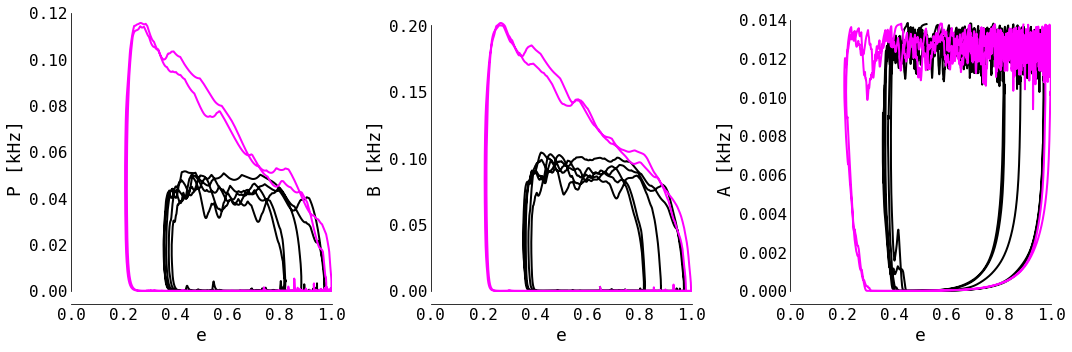

In [4]:
_, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(15,5))

# no B->P depression
axs[0].plot(no_dep.sel({"output": "e_SynDep"}).T, no_dep.sel({"output": "r_mean_EXC"}).T, color="k")
axs[1].plot(no_dep.sel({"output": "e_SynDep"}).T, no_dep.sel({"output": "r_mean_INH"}).T, color="k")
axs[2].plot(no_dep.sel({"output": "e_SynDep"}).T, no_dep.sel({"output": "r_mean_aSWR"}).T, color="k")

# with B->P depression
axs[0].plot(dep.sel({"output": "e_SynDep"}).T, dep.sel({"output": "r_mean_EXC"}).T, color="fuchsia")
axs[1].plot(dep.sel({"output": "e_SynDep"}).T, dep.sel({"output": "r_mean_INH"}).T, color="fuchsia")
axs[2].plot(dep.sel({"output": "e_SynDep"}).T, dep.sel({"output": "r_mean_aSWR"}).T, color="fuchsia")

axs[0].set_ylabel("P [kHz]")
axs[1].set_ylabel("B [kHz]")
axs[2].set_ylabel("A [kHz]")

for ax in axs:
    ax.set_xlabel("e")
    ax.set_xlim([0, 1.0])
    sns.despine(ax=ax, trim=True)
    
plt.tight_layout()

plt.savefig("../figs/b_p_depression.pdf", transparent=True, bbox_inches="tight")